<a href="https://colab.research.google.com/github/Sidharth-Darwin/PyTorch_Programs/blob/main/LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LeNet Architecture

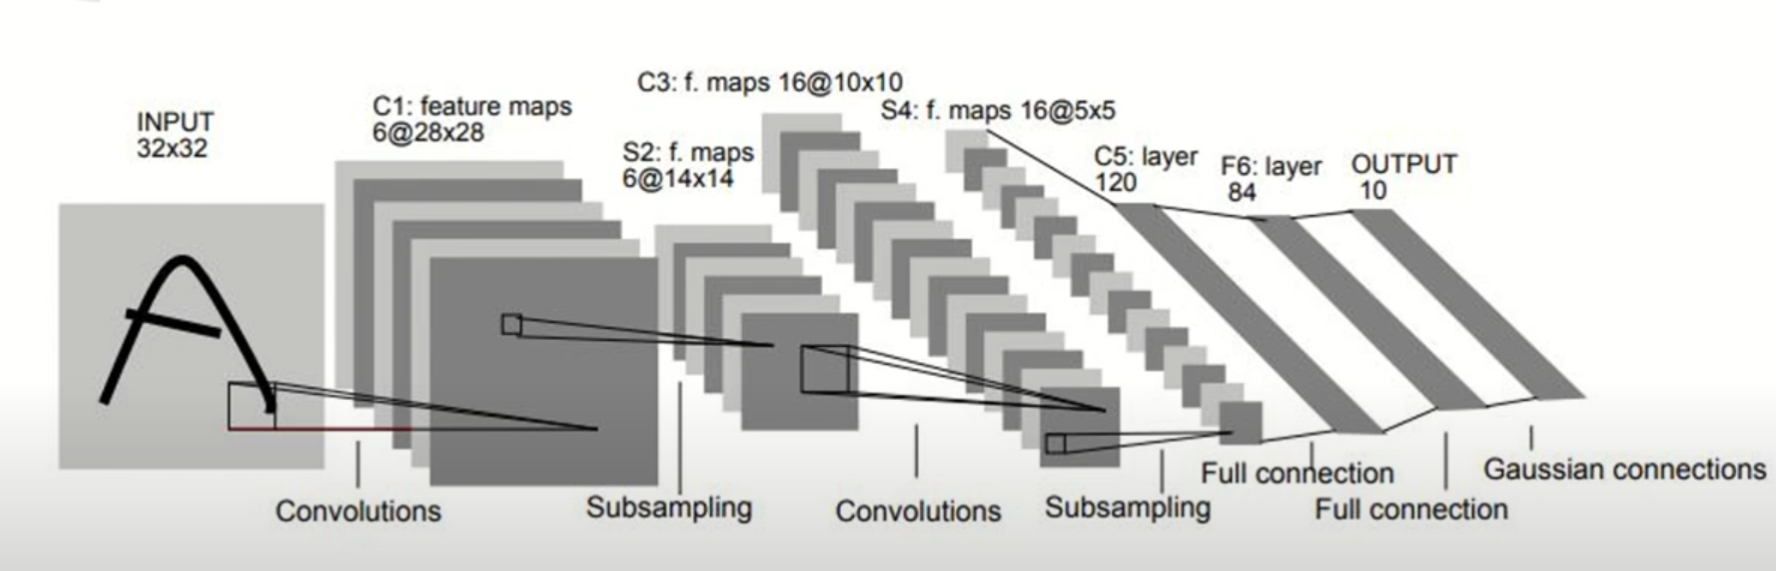

# Code

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
class LeNet(nn.Module):
    def __init__(self) -> None:
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(5, 5), stride=1)
        self.subsample1 = nn.AvgPool2d(kernel_size=(2, 2), stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5, 5), stride=1)
        self.subsample2 = nn.AvgPool2d(kernel_size=(2, 2), stride=2)
        self.flatten = nn.Flatten()
        self.dense1 = nn.Linear(in_features=400, out_features=120)
        self.dense2 = nn.Linear(in_features=120, out_features=84)
        self.dense3 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        out = F.tanh(self.conv1(x))
        out = F.tanh(self.subsample1(out))
        out = F.tanh(self.conv2(out))
        out = F.tanh(self.subsample2(out))
        out = F.tanh(self.flatten(out))
        out = F.tanh(self.dense1(out))
        out = F.tanh(self.dense2(out))
        out = self.dense3(out)
        return out

model = LeNet().to(device)
model

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (subsample1): AvgPool2d(kernel_size=(2, 2), stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (subsample2): AvgPool2d(kernel_size=(2, 2), stride=2, padding=0)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dense1): Linear(in_features=400, out_features=120, bias=True)
  (dense2): Linear(in_features=120, out_features=84, bias=True)
  (dense3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
model(torch.randn((1, 1, 32, 32)).to(device)).shape

torch.Size([1, 10])

In [ ]:
root = "/content/MnistData"
transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize((32, 32))
])

train_data = torchvision.datasets.mnist.MNIST(
    root=root,
    train=True,
    transform=transforms,
    download=True
)
test_data = torchvision.datasets.mnist.MNIST(
    root=root,
    train=False,
    transform=transforms,
    download=True
)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:14<00:00, 682352.66it/s] 


Extracting /content/MnistData/MNIST/raw/train-images-idx3-ubyte.gz to /content/MnistData/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 132389.60it/s]


Extracting /content/MnistData/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MnistData/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:06<00:00, 240148.13it/s]


Extracting /content/MnistData/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MnistData/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3830792.03it/s]

Extracting /content/MnistData/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MnistData/MNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
img, label = train_data[0]
print(img.shape, label)

torch.Size([1, 32, 32]) 5


In [ ]:
img.numpy()

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

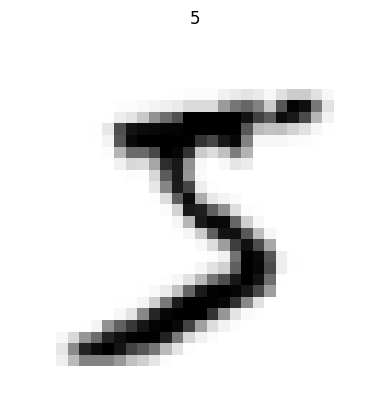

In [ ]:
plt.imshow(img.numpy()[0], cmap=plt.cm.Greys)
plt.title(label)
plt.axis(False)
plt.show()

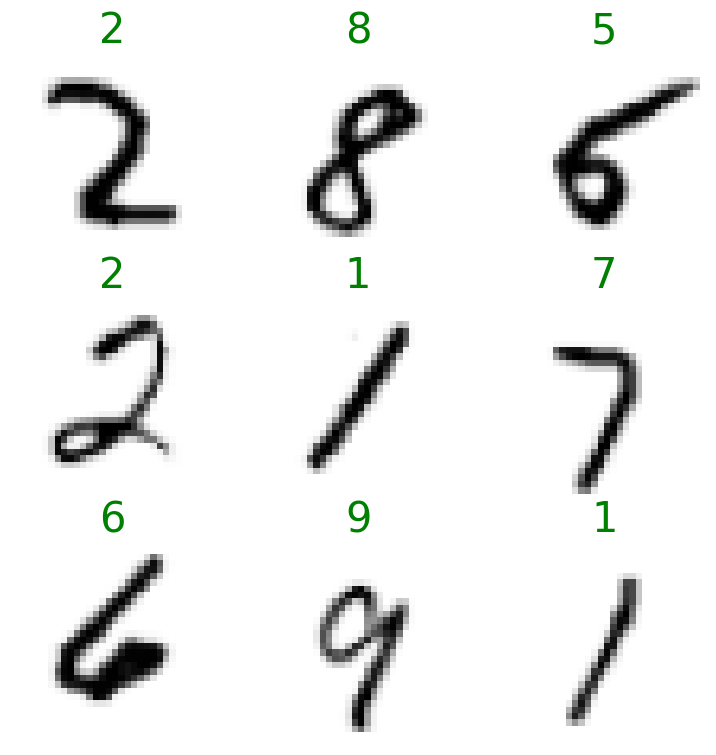

In [ ]:
n_rows = 3
n_cols = 3

rand_indices = np.random.randint(0, len(train_data), size=(n_rows*n_cols))
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows*3))
axs = axs.flatten()

for ax, indice in zip(axs, rand_indices):
    img, label = train_data[indice]
    img = img.numpy()[0]
    ax.imshow(img, cmap=plt.cm.Greys)
    ax.set_title(label, fontdict={'color': "g", "fontsize": 30})
    ax.axis(False)

plt.show()

In [ ]:
train, val = torch.utils.data.random_split(train_data, [50000, 10000])

In [ ]:
batch_size = 32

train_loader = DataLoader(train, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [ ]:
len(train_loader), len(val_loader), len(test_loader)

(1563, 313, 313)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
def train(model, data, loss_fn, optimizer):
    n_samples = len(data.dataset)
    model.train()

    print("Train: ")

    for batch, (images, labels) in enumerate(data):
        images = images.to(device)
        labels = labels.to(device)
        logits = model(images)
        loss = loss_fn(logits, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch%100 == 0:
            print(f"---> [{(batch+1)*len(labels):5d}/{n_samples:5d}] Loss: {loss.item():.4f}")

    print(f"---> [{n_samples:5d}/{n_samples:5d}] Loss: {loss.item():.4f}")

In [ ]:
def test(model, data, loss_fn):
    n_samples = len(data.dataset)
    n_batches = len(data)
    n_correct = 0
    avg_loss = 0
    model.eval()

    for images, labels in data:
        images = images.to(device)
        labels = labels.to(device)
        logits = model(images)
        loss = loss_fn(logits, labels)
        avg_loss += loss.item()
        predictions = logits.argmax(dim=1)
        n_correct += (predictions==labels).type(torch.float).sum().item()

    avg_loss /= n_batches
    accuracy = n_correct*100/n_samples

    print(f"Test Avg Loss: {avg_loss:.4f} Accuracy: {accuracy:.3f}")
    return avg_loss

In [ ]:
n_epochs = 100

early_stopping_var = 99999999
saved_parameters = None
for i in range(n_epochs):
    print(f"EPOCH {i+1}: ")
    train(model, train_loader, loss_fn, optimizer)
    loss = test(model, val_loader, loss_fn)
    if loss >= early_stopping_var:
        print(f"Early stopping occured at epoch {i+1}")
        break
    else:
        early_stopping_var = loss
        saved_parameters = model.state_dict()
    print("---------------------------------")
model.load_state_dict(saved_parameters)

EPOCH 1: 
Train: 
---> [   32/50000] Loss: 2.3271
---> [ 3232/50000] Loss: 2.2798
---> [ 6432/50000] Loss: 2.2702
---> [ 9632/50000] Loss: 2.2334
---> [12832/50000] Loss: 2.2008
---> [16032/50000] Loss: 2.0404
---> [19232/50000] Loss: 1.7508
---> [22432/50000] Loss: 1.4806
---> [25632/50000] Loss: 1.1743
---> [28832/50000] Loss: 0.8683
---> [32032/50000] Loss: 0.8375
---> [35232/50000] Loss: 0.9021
---> [38432/50000] Loss: 0.6931
---> [41632/50000] Loss: 0.5894
---> [44832/50000] Loss: 0.6762
---> [48032/50000] Loss: 0.3648
---> [50000/50000] Loss: 0.6979
Test Avg Loss: 0.5346 Accuracy: 85.820
---------------------------------
EPOCH 2: 
Train: 
---> [   32/50000] Loss: 0.4067
---> [ 3232/50000] Loss: 0.6115
---> [ 6432/50000] Loss: 0.3758
---> [ 9632/50000] Loss: 0.4777
---> [12832/50000] Loss: 0.3737
---> [16032/50000] Loss: 0.4437
---> [19232/50000] Loss: 0.4120
---> [22432/50000] Loss: 0.4440
---> [25632/50000] Loss: 0.5240
---> [28832/50000] Loss: 0.4592
---> [32032/50000] Loss: 0.

<All keys matched successfully>

In [ ]:
test(model, test_loader, loss_fn)

Test Avg Loss: 0.0451 Accuracy: 98.550


0.04507091376348771

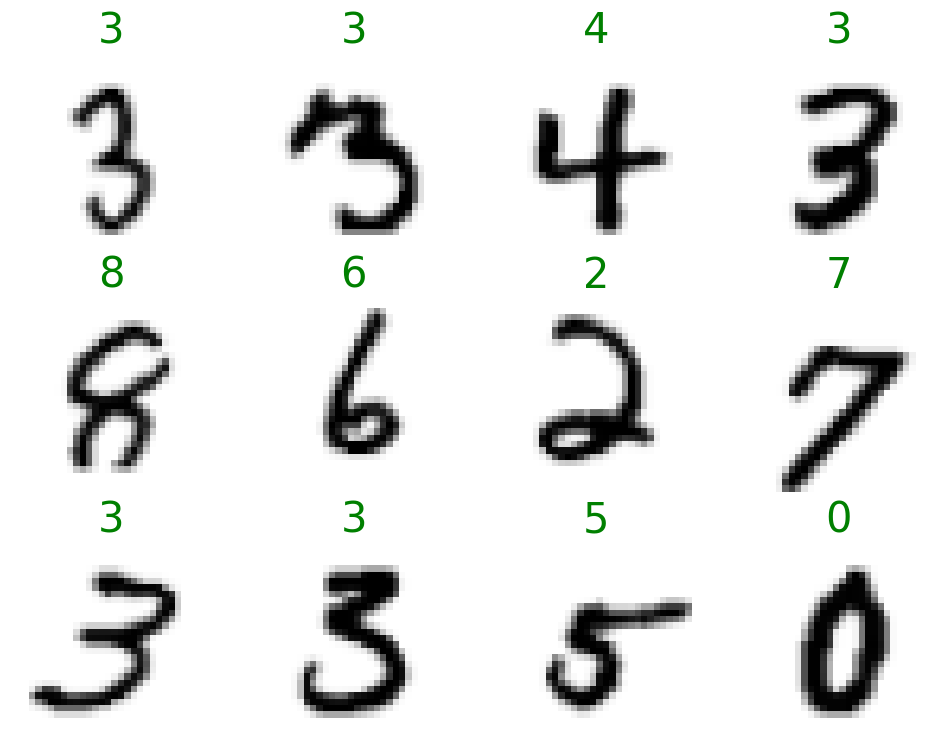

In [ ]:
n_rows = 3
n_cols = 4

rand_indices = np.random.randint(0, len(test_loader.dataset), size=(n_rows*n_cols))
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows*3))
axs = axs.flatten()

for ax, indice in zip(axs, rand_indices):
    img, label = test_loader.dataset[indice]
    pred = model(torch.unsqueeze(img.to(device), 0)).argmax(-1).item()
    img = img.numpy()[0]
    ax.imshow(img, cmap=plt.cm.Greys)
    if pred == label:
        ax.set_title(label, fontdict={'color': "g", "fontsize": 30})
    else:
        ax.set_title(pred, fontdict={'color': "r", "fontsize": 30})
    ax.axis(False)

plt.show()

In [ ]:
torch.save(model, "model.pth")

In [ ]:
new_model = torch.load("model.pth")
test(new_model, test_loader, loss_fn)

<ipython-input-21-803b04ed08f3>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model = torch.load("model.pth")


Test Avg Loss: 0.0451 Accuracy: 98.550


0.04507091376348771

# Visualizing the feature maps

In [ ]:
new_model

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (subsample1): AvgPool2d(kernel_size=(2, 2), stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (subsample2): AvgPool2d(kernel_size=(2, 2), stride=2, padding=0)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dense1): Linear(in_features=400, out_features=120, bias=True)
  (dense2): Linear(in_features=120, out_features=84, bias=True)
  (dense3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
img, label = train_data[np.random.randint(0, len(train_data))]

In [ ]:
conv_layers = []
for layer in new_model.children():
    if isinstance(layer, nn.Conv2d):
        conv_layers.append(layer)
conv_layers

[Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1)),
 Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))]

In [ ]:
feature_maps = [conv_layers[0](img.unsqueeze(0).to(device))]
for i in range(1, len(conv_layers)):
    feature_maps.append(conv_layers[i](feature_maps[-1]))

Layer:  1


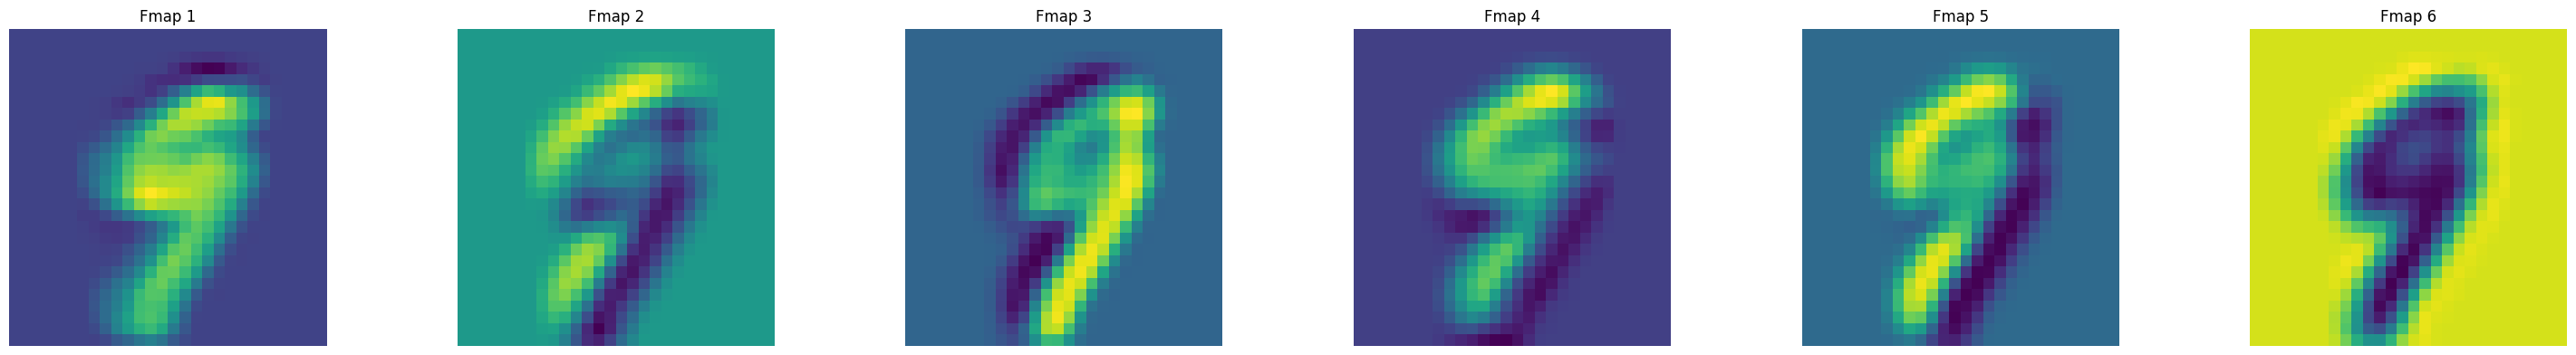

Layer:  2


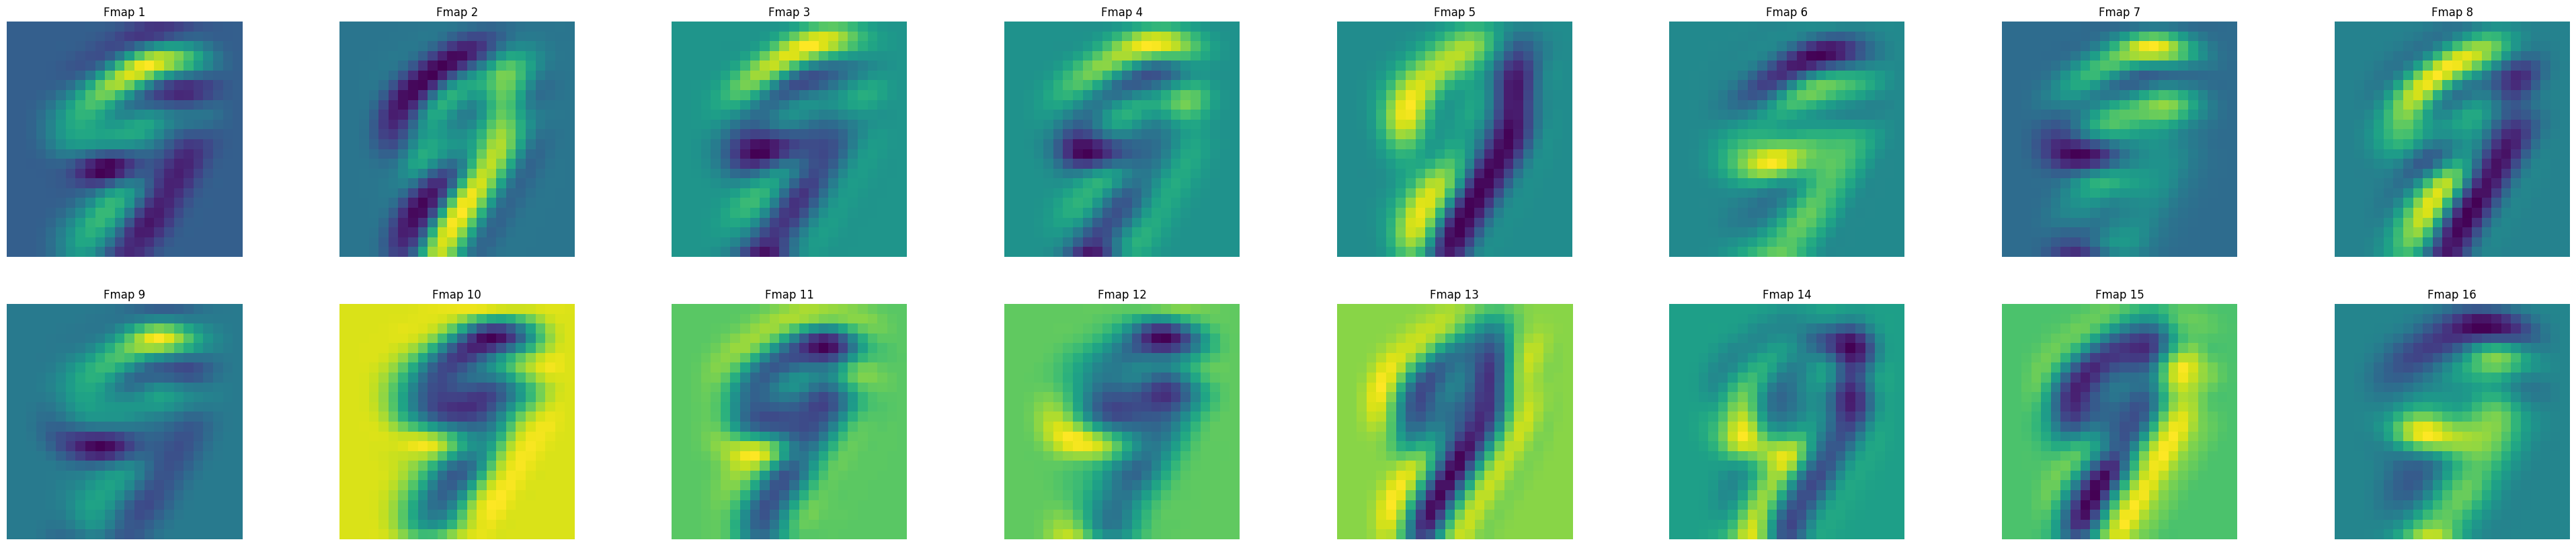

In [ ]:
for layer_no, fmap_per_layer in enumerate(feature_maps):
    fmap_per_layer = fmap_per_layer.squeeze().detach().cpu()
    print("Layer: ", layer_no+1)
    plt.figure(figsize=(50, 10))
    for i in range(len(fmap_per_layer)):
        fmap = fmap_per_layer[i].numpy()
        plt.subplot(2, 8, i+1)
        plt.imshow(fmap)
        plt.title(f"Fmap {i+1}")
        plt.axis(False)
    plt.show()


Layer:  1


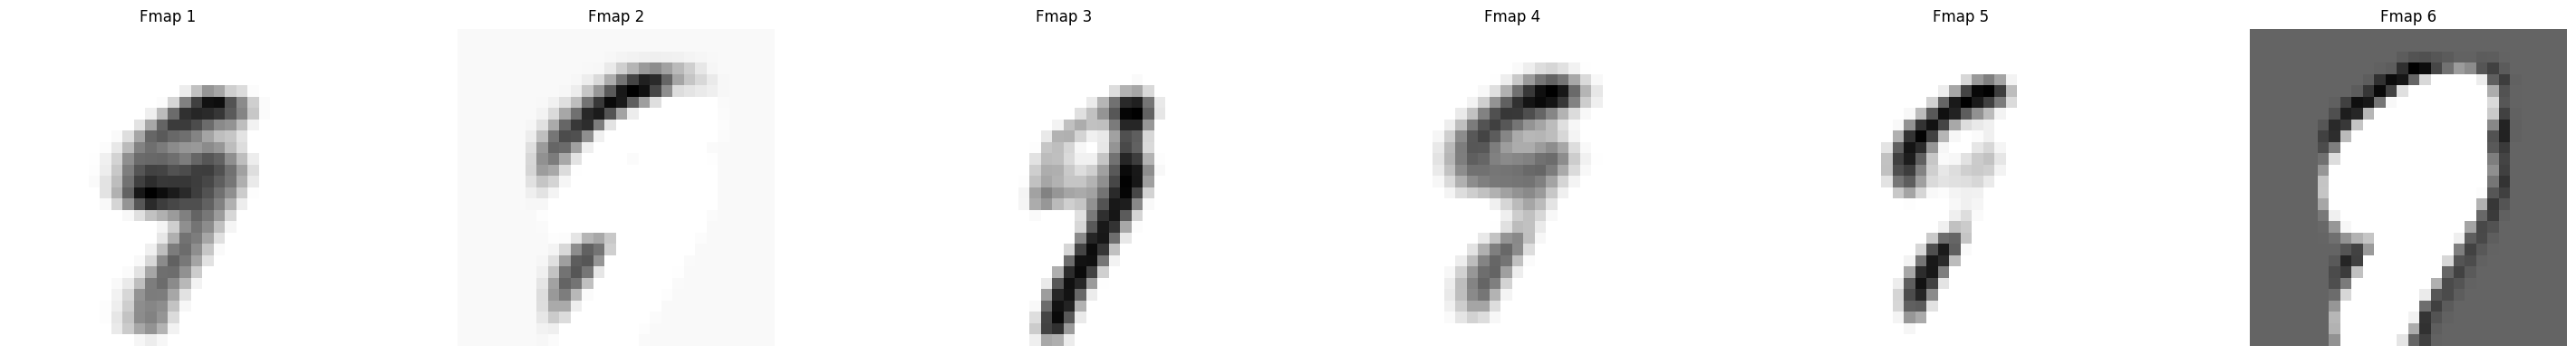

Layer:  2


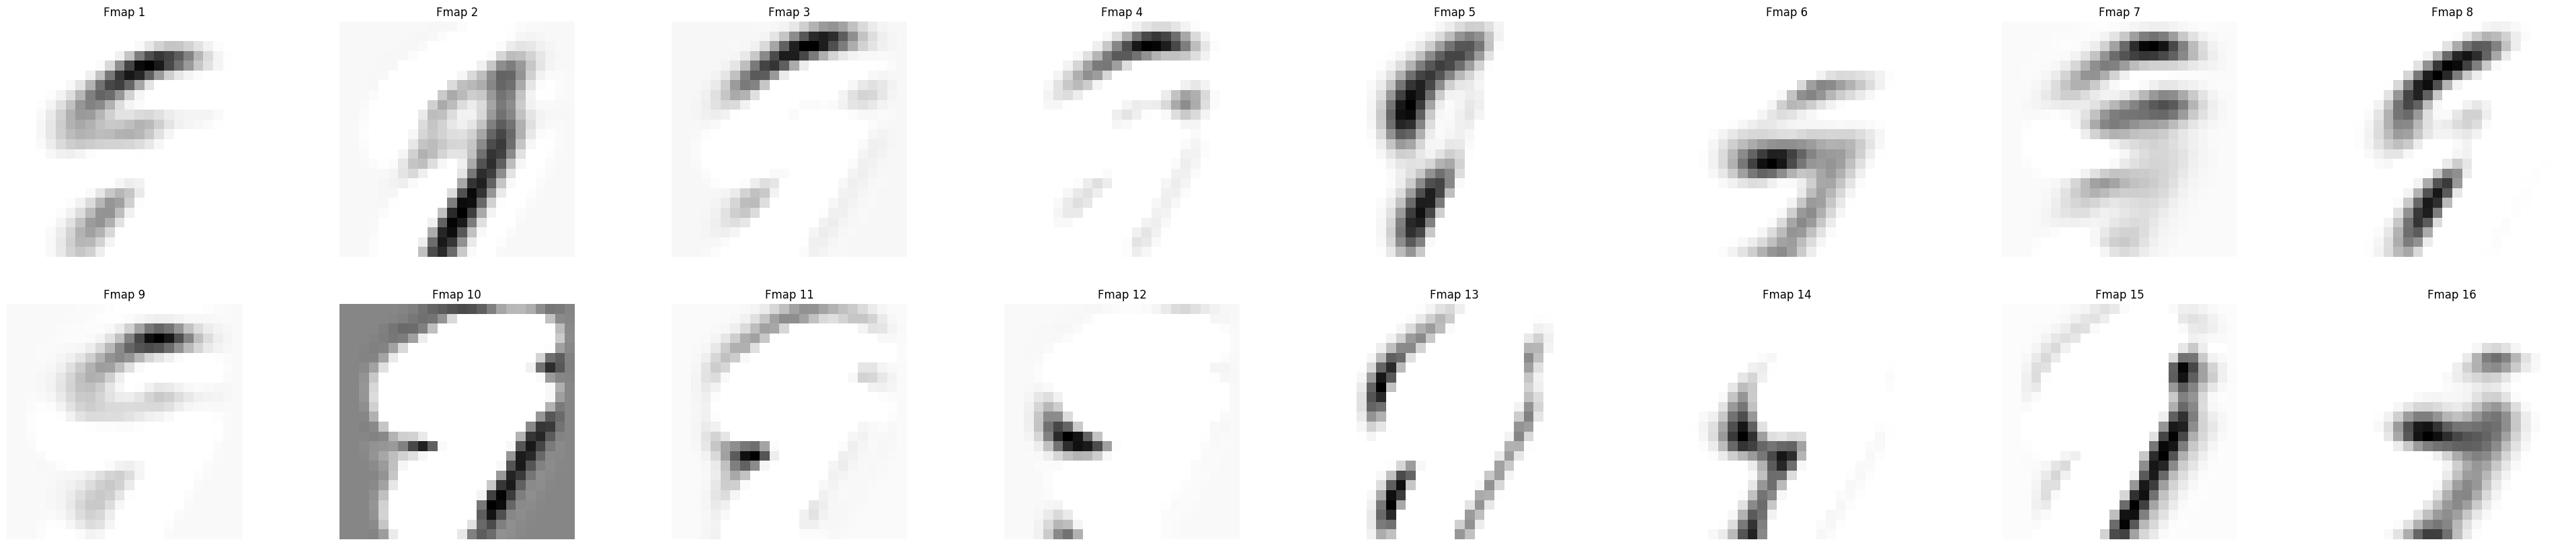

In [ ]:
for layer_no, fmap_per_layer in enumerate(feature_maps):
    fmap_per_layer = fmap_per_layer.squeeze().detach().cpu()
    print("Layer: ", layer_no+1)
    plt.figure(figsize=(50, 10))
    for i in range(len(fmap_per_layer)):
        fmap = fmap_per_layer[i].numpy()
        fmap = np.where(fmap>0, fmap, np.zeros_like(fmap))
        plt.subplot(2, 8, i+1)
        plt.imshow(fmap, cmap=plt.cm.Greys)
        plt.title(f"Fmap {i+1}")
        plt.axis(False)
    plt.show()

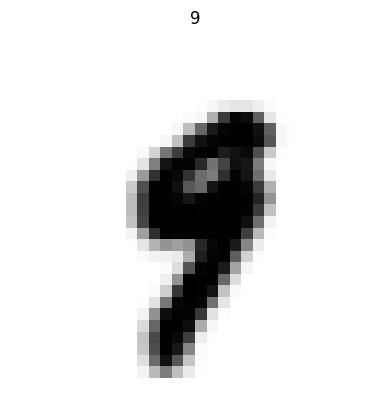

In [ ]:
plt.imshow(img.cpu().squeeze(), cmap=plt.cm.Greys)
plt.title(label)
plt.axis(False)
plt.show()
plt.close()